In [63]:
import statsmodels.formula.api as smf 
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import scipy

In [64]:
warnings.filterwarnings("ignore")

# Generate Heteroscedascity Data

In [67]:
n_samples = 100
y = np.stack([np.random.normal(scale=np.arange(1,n_samples)) 
          for x in range(10)]).std(axis=0)
x = np.arange(1,n_samples)

Text(0.5, 1.0, 'Heteroscedascity Data')

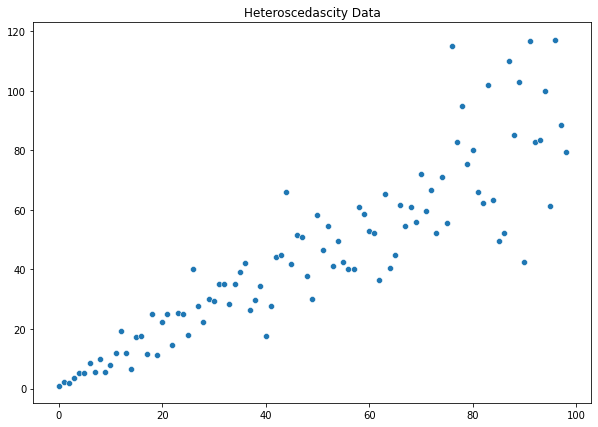

In [68]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=y)
plt.title("Heteroscedascity Data")

# OLS

In [69]:
df = pd.DataFrame({'x': pd.Series(data=x), 'y': pd.Series(data=y)})

In [70]:
model_ols = smf.ols("x ~ y", data=df).fit() 

In [71]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     396.1
Date:                Thu, 10 Jun 2021   Prob (F-statistic):           5.05e-36
Time:                        12:06:16   Log-Likelihood:                -391.89
No. Observations:                  99   AIC:                             787.8
Df Residuals:                      97   BIC:                             793.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.7060      2.399      4.046      0.0

# Diagnostic

In [72]:
# model fitted
model_fitted_y = model_ols.fittedvalues
# model residuals
model_residuals = model_ols.resid
# normalized residuals
model_norm_residuals = model_ols.get_influence().resid_studentized_internal
# absolute residuals
model_abs_resid = np.abs(model_residuals)
# absolute squared normalized residuals
model_abs_resid_sqrt = np.sqrt(model_abs_resid)
# leverage
model_leverage = model_ols.get_influence().hat_matrix_diag
# cook model
model_cooks = model_ols.get_influence().cooks_distance[0]

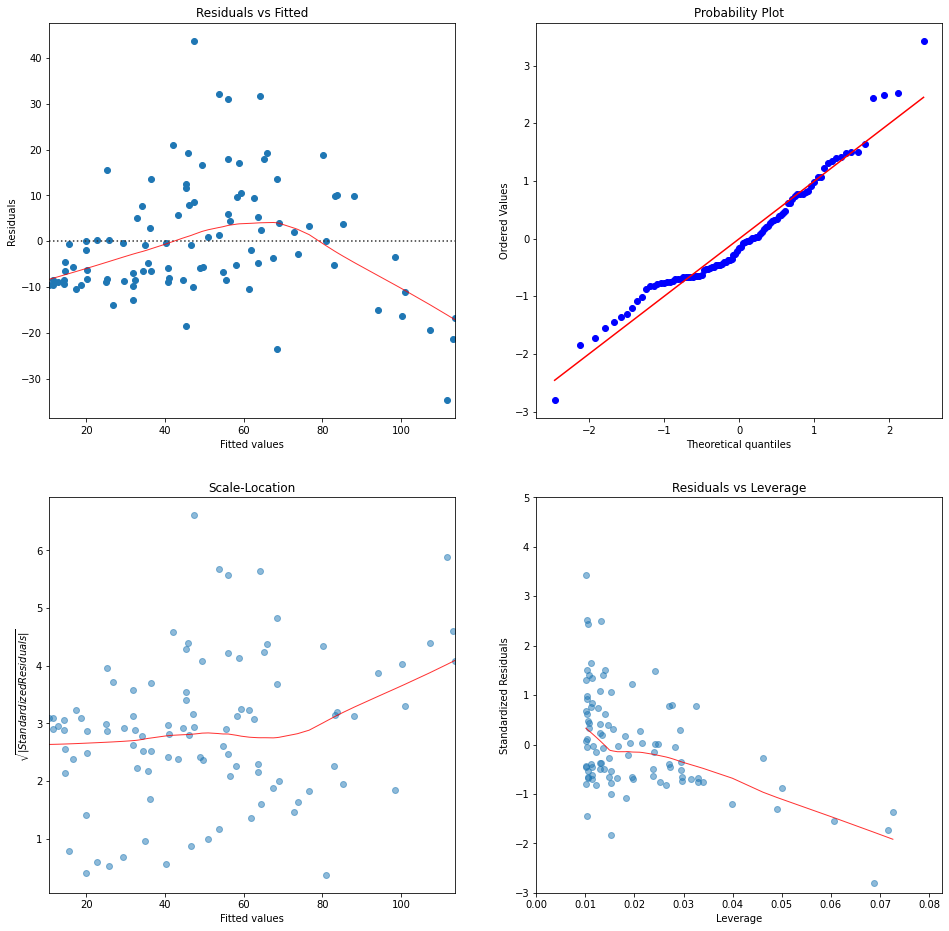

In [90]:
plt.figure(figsize=(16,16))

plt.subplot(2, 2, 1)
plot_lm_1 = plt.figure(1)
plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'x', data=df, 
                          lowess=True, 
                          scatter_kws={'alpha': 1}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

    
plt.subplot(2, 2, 2)
scipy.stats.probplot(model_norm_residuals, dist="norm", plot=matplotlib.pyplot)

plt.subplot(2, 2, 3)
plot_lm_3 = plt.figure(1)
plt.scatter(model_fitted_y, np.sqrt(model_abs_resid), alpha=0.5)
sns.regplot(model_fitted_y, np.sqrt(model_abs_resid),
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot_lm_3.axes[2].set_title('Scale-Location')
plot_lm_3.axes[2].set_xlabel('Fitted values')
plot_lm_3.axes[2].set_ylabel('$\sqrt{|Standardized Residuals|}$')

plt.subplot(2, 2, 4)
plot_lm_4 = plt.figure(1);
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
plot_lm_4.axes[3].set_xlim(0, max(model_leverage)+0.01)
plot_lm_4.axes[3].set_ylim(-3, 5)
plot_lm_4.axes[3].set_title('Residuals vs Leverage')
plot_lm_4.axes[3].set_xlabel('Leverage')
plot_lm_4.axes[3].set_ylabel('Standardized Residuals');

plt.show()

# WLS

In [74]:
df["weight_1"] = model_fitted_y

In [84]:
model_wls_1 = sm.WLS(y, x, (df['weight_1']**-2))

In [85]:
mod_res_1 = model_wls_1.fit() 

In [86]:
print(mod_res_1.summary())

                                 WLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.935
Model:                            WLS   Adj. R-squared (uncentered):              0.934
Method:                 Least Squares   F-statistic:                              1408.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                    6.07e-60
Time:                        12:07:05   Log-Likelihood:                         -361.09
No. Observations:                  99   AIC:                                      724.2
Df Residuals:                      98   BIC:                                      726.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# GLS

In [87]:
gls_model = sm.GLS(y, x, sigma=(df['weight_1']**-3))

In [88]:
gls_results = gls_model.fit()

In [89]:
print(gls_results.summary())

                                 GLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            GLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              2284.
Date:                Thu, 10 Jun 2021   Prob (F-statistic):                    1.03e-69
Time:                        12:07:15   Log-Likelihood:                         -476.85
No. Observations:                  99   AIC:                                      955.7
Df Residuals:                      98   BIC:                                      958.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------